
<h1 style='background-color: #6495ED; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' >Predicting Life Expectancy Using Linear Regression </h1>
Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

<img src="https://media.licdn.com/dms/image/D4D12AQEVe9gqBelM5Q/article-cover_image-shrink_720_1280/0/1672742379196?e=2147483647&v=beta&t=m8-GsGRllbkFw8PxCnfAlIEkO2OeD8FiZrfIXz0XM90">

<h1 style='background-color:#6495ED ; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' > Exploratory Data Analysis </h1>


In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [ ]:
# loading data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=10nKWCvHYHkdM_KwretKe5mWq47Lc2I99") #DataFrame
df.tail(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,...,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6
2922,Zimbabwe,2015,Developing,67.0,336.0,22,NaN,0.000000,87.0,0,...,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1
2927,Zimbabwe,2010,Developing,52.4,527.0,29,5.21,53.308581,9.0,9696,...,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0


In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

#Exercise 1: EDA

Perform some Exploratory Data analysis and give atleast 4 observations explaining each observations with a Figure. Providing answer to the below questions my help but you are free to come up with something else.
- <l1> How does Infant and Adult mortality rates affect life expectancy?</li>
- <l1>Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol.</li>
- <l1>What is the impact of schooling on the lifespan of humans?</li>
- <l1>Do densely populated countries tend to have lower life expectancy?</li>




In [ ]:
df.columns #Printing the columns as a list

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset')

There are 2938 rows and 22 columns in this dataset


In [ ]:
df_c = df['Life expectancy ']

In [ ]:
print("Number of Countries: ",len(df['Country'].unique()))

Number of Countries:  193


In [ ]:
print(df['Status'].unique())

#Creating a new column for status with int value representations
status_dict = {'Developing' : 0, 'Developed' : 1}
df['Status_Value'] = df['Status'].map(status_dict)

['Developing' 'Developed']


Text(0.5, 1.0, 'Correlation Heatmap')

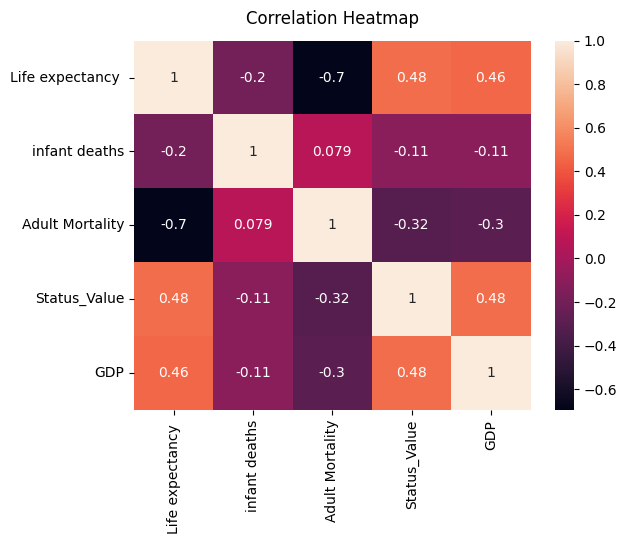

In [ ]:
# Plotting the correlation between various columns of the data set

correlation_matrix = df[['Life expectancy ', 'infant deaths', 'Adult Mortality', 'Status_Value', 'GDP']].corr()
heatmap = sns.heatmap(correlation_matrix, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

In [ ]:
mean_alcohol_consumption = df[['Alcohol', 'GDP']].groupby('GDP', as_index = False)
print(mean_alcohol_consumption)

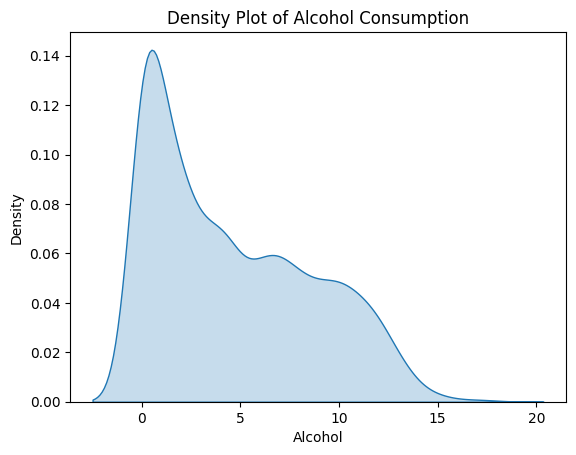

In [ ]:
# Plotting the density plot of Alcohol consumption
mean_alcohol_consumption = df[['Alcohol', 'Country']].groupby('Country', as_index = False)
sns.kdeplot(data=df, x='Alcohol', shade=True) #KDE Plot
plt.title('Density Plot of Alcohol Consumption')
plt.show()

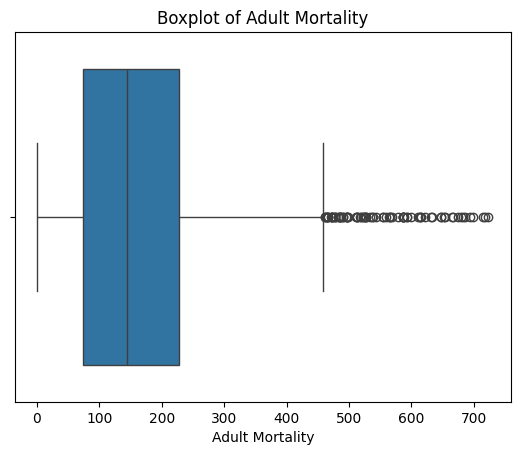

In [ ]:
# Plotting the boxplot of Adult Mortality
sns.boxplot(data=df, x='Adult Mortality')
plt.title('Boxplot of Adult Mortality')
plt.show()

#Exercise 2: Data Processing and Model Developement

- Select an appropriate method for dealing with Null values in the data set and briefly coment on your choice

- Select most relevant features for training if need be.

- Split the data into training and testing sets in the ratio 80% : 20% respectively

- Fit a Multilinear Regression and print the mean cross validation score.


In [ ]:
#Several columns have null values. We will fill them by interpolation
df = df.interpolate(limit_direction = 'both')
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Value                       0
dtype: int64

In [ ]:
#Setting dependent and independent variables

X = df.drop(['Life expectancy ', 'Country', 'Year', 'Status'], axis = 1).values
Y = df['Life expectancy '].values

In [ ]:
#Performing train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
#Applying a standard scaler to normalise the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
#Creating linear regressor model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [ ]:
#Checking model scores
model.score(X_test_scaled, Y_test)

0.8264078977653783

In [ ]:
#Performing Cross Validation
from sklearn.model_selection import cross_val_score

k_fold = 5
score = cross_val_score(model, X_train_scaled, Y_train, cv = k_fold)
score

array([0.82167431, 0.83150698, 0.77168154, 0.78873742, 0.81468493])

In [ ]:
np.mean(score) #Averaging the 5 cross validation scores

0.8056570354887087

In [ ]:
X_column = df.drop(['Life expectancy ', 'Country', 'Year', 'Status'], axis = 1) #A column of the independent variables used..
X_column

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
list1 = X_column.columns
list2 = model.coef_ # A list of Coefficients

# Mapping the the independent variables to their coefficients
Life_expectancy_factors = [f"{item1}:{item2}" for item1, item2 in zip(list1, list2)]

In [ ]:
Life_expectancy_factors

['Adult Mortality:-2.616042384290288',
 'infant deaths:10.733799796691954',
 'Alcohol:0.2792214961107732',
 'percentage expenditure:0.3905761559802268',
 'Hepatitis B:-0.27666290254997716',
 'Measles :-0.4067142133512533',
 ' BMI :0.9069856077763766',
 'under-five deaths :-11.000946016237895',
 'Polio:0.5993680132127163',
 'Total expenditure:0.07121694206785682',
 'Diphtheria :0.9551285416501215',
 ' HIV/AIDS:-2.4202253067203947',
 'GDP:0.2570027683996158',
 'Population:0.08609676348521086',
 ' thinness  1-19 years:-0.42819395040388464',
 ' thinness 5-9 years:0.12304739391371149',
 'Income composition of resources:1.3661807132315464',
 'Schooling:1.8476564856309174',
 'Status_Value:0.5968958523190322']